<hr>

### IMPORTAÇÕES

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sympy as symbols
from pandas.api.types import is_numeric_dtype

> <hr>

### DATASET

> Permanece o mesmo por enquanto;

In [13]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [14]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [15]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

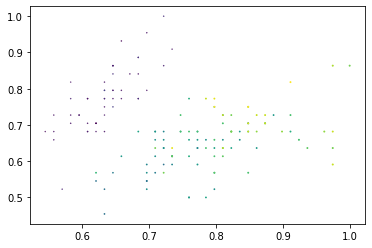

In [16]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

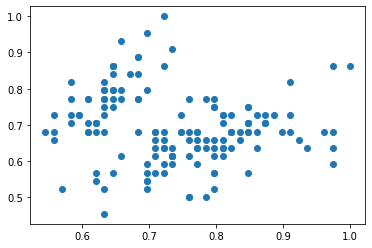

In [17]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

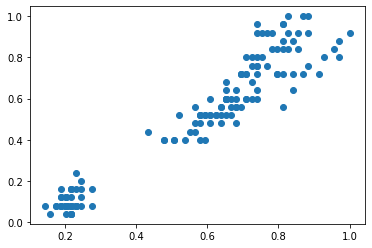

In [18]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### Observações Implementação

In [19]:
# pois um lance que percebi é que deixei o kernel trick com deus, não implementei ele
# daí, como ele parece um boa estretégia principalmente pra dados menos controlados como o do iris, vou tentar colocar aqui
# fiz um notebook só pra isso pq se der problema demais pelo menos não atrapalha o que já tá encaminhado
# vi que tem opções diferentes de implementar ele, daí vamo seguir o esquema do artigo, se possível
    # "In kernel-based clustering algorithms it is possible to compute Euclidean distances by using kernel functions and the so-called distance kernel trick."
    # This trick uses a kernel function to calculate the dot products of vectors implicitly in the higher dimensional space using the original space."
    # artigo prof
# a fórmula implementada aqui é a do artigo mesmo

# além do kernel trick faltou tb lagrane

# bora por partes > COISAS PARA RESOLVER:
    # 1. Kernel trick + largura = FEITO
    # 2. Lagrange (entender onde entra e colocar) = FAZENDO

### FUZZY C-MEANS

In [20]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [21]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

> Acho que aqui vai caber definir algumas coisas como funções e não mais como valores fixos

In [22]:
# number of clusters
    # definido como 3 pq conheço o iris dataset
K = 3

# fuzziness value 
m = [1.1, 1.6, 2]
# os valores definidos acima foram indicados pelo professor

In [23]:
# cálculo com base na função do artigo que o professor mostrou
def calcular_sigma(iris_data_without_last_column):
    n = iris_data_without_last_column.shape[0]
    total_distance = 0

    # bora por partes pq nem eu e nem o gpt somos deus
    # soma pra todos os pares de distância
    for i in range(n):
        for j in range(n):
            total_distance += np.linalg.norm(iris_data_without_last_column[i] - iris_data_without_last_column[j])**2

    # média e raiz
    sigma = np.sqrt(total_distance / (2 * n**2))
    return sigma

# calcular
sigma = calcular_sigma(iris_data_without_last_column)
print("Valor de sigma:", sigma)

Valor de sigma: 0.4219931232129643


In [24]:
# definir um início randomico p U
U = np.random.rand(iris_data_without_last_column.shape[0], K)

In [25]:
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range(K):
        U_corrigido = np.tile(U[:, i][:, np.newaxis], (1, iris_data_without_last_column.shape[1]))
        m_expandido = np.tile(m[i], (iris_data_without_last_column.shape[0], iris_data_without_last_column.shape[1]))
        centroides[i, :] = np.sum((U_corrigido ** m_expandido) * iris_data_without_last_column, axis=0) / np.sum(U_corrigido ** m_expandido)
    return centroides

centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

In [26]:
def gaussian_kernel(iris_data_without_last_column, centroides, sigma):
    """
    EQUAÇÃO DO KERNEL TRICK
    
    """
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    kernel_m = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distance_squared = np.sum((iris_data_without_last_column[i] - centroides[j]) ** 2)
            kernel_m[i, j] = np.exp(-0.5 * distance_squared / sigma**2) # -0.5 como o -1/2 antes que eu surte e ache que tá errado de novo

    return kernel_m

kernel_m = gaussian_kernel(iris_data_without_last_column, centroides, sigma)

def kg_membership(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a matriz de membership fuzzy entre os dados e os centroides usando o kernel gaussiano.

    Args:
    iris_data_without_last_column (ndarray): Conjunto de dados.
    centroides (ndarray): Matriz de centroides dos clusters.
    sigma (float): parâmetro de largura!!!!! muito importante futuramente (sim preciso escrever isso em todo lugar para quando a ansiedade bater)
   
   Returns:
    ndarray: matriz de MEMBERSHIP fuzzy
        # lembrando que o pertencimento com kernel é calculado com base nas distâncias
        # então aqui meio que substitui a matriz_dg do FCM
    """
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    U_novo = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            x = iris_data_without_last_column[i:i+1]  # Seleciona um ponto de dados como um vetor unidimensional
            c = centroides[j:j+1]  # Seleciona um centróide como um vetor unidimensional
            U_novo[i, j] = gaussian_kernel(x, c, sigma)

    return U_novo # novos valores de pertinência agora foram calculados com KERNEL

U_novo =  kg_membership(iris_data_without_last_column, centroides, sigma)

def matriz_dg(iris_data_without_last_column, centroides):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return distancias

matriz_dg = matriz_dg(iris_data_without_last_column, centroides)

# mudando a função objetivo pra considerar o kernel
def fobj_kernel(U_novo, kernel_matrix, m):
    # os valores da função vão sendo somados 
    
    c, n = U_novo.shape
    objetivo = 0

    for i in range(c):
        for j in range(n):
            objetivo += U_novo[i, j] ** m * kernel_matrix[i, j]

    return objetivo

N = iris_data_without_last_column.shape[0] # número de dados
velho_obj = fobj_kernel(U_novo, matriz_dg, m)

In [32]:
maximo = 100

# Inicializar valores de pertinência e centroides
U = np.random.rand(iris_data_without_last_column.shape[0], K)
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

# Calcular matriz de distâncias inicial
J_anterior = matriz_dg


print("Centroides iniciais:")
print(centroides)
print()
print("Membership iniciais:")
print(U)
print()
print('J:')
print(J_anterior)
print()


for iteration in range(maximo):
    # Atualizar valores de pertinência e centroides
    U_novo = kg_membership(iris_data_without_last_column, centroides, sigma)
    centroides = calculando_centroides(iris_data_without_last_column, K, U_novo, m)
    
    # Calcular nova matriz de distâncias
    nova_J = matriz_dg
    
    # Calcular função objetivo
    novo_objetivo = fobj_kernel(U_novo, nova_J, m)

    # Verificar convergência
    if (np.all(nova_J <= J_anterior) or 
        np.all(np.abs(novo_objetivo - velho_obj) < 1e-6) or
        iteration == maximo - 1):
        break

    # Atualizar valores para a próxima iteração
    velho_obj = novo_objetivo
    J_anterior = nova_J

    # Atualizar pertinências para a próxima iteração
    U = U_novo
    
    
print("Centroides finais:")
print(centroides)
print()
print("Membership final:")
print(U)
print()
print('J final:')
print(nova_J)
print()

Centroides iniciais:
[[0.18348082 0.17348398 0.13513331 0.11945133]
 [0.18676784 0.17279191 0.14253666 0.12763149]
 [0.18393437 0.1701163  0.1398318  0.12331986]]

Membership iniciais:
[[0.87867443 0.14499365 0.25757975]
 [0.75354383 0.67232558 0.36948954]
 [0.45872915 0.72689411 0.23936497]
 [0.46240732 0.24349586 0.1935513 ]
 [0.24013348 0.45989119 0.20812057]
 [0.34507159 0.38373618 0.47380798]
 [0.53756154 0.50239198 0.91827136]
 [0.01235045 0.13685745 0.17661178]
 [0.07781992 0.73391284 0.97604446]
 [0.21242418 0.27632553 0.65396632]
 [0.39402522 0.1000813  0.3209655 ]
 [0.49296464 0.20144115 0.00350186]
 [0.35657459 0.42253005 0.82326881]
 [0.26134527 0.94887676 0.51620246]
 [0.44665391 0.29529142 0.5483672 ]
 [0.40635674 0.9107041  0.04571783]
 [0.72605849 0.59066861 0.49613011]
 [0.82095425 0.51993506 0.12196319]
 [0.33900741 0.1234733  0.313308  ]
 [0.98244319 0.62585745 0.05482769]
 [0.53366987 0.97526157 0.09057018]
 [0.91655148 0.36498499 0.04715994]
 [0.66166685 0.49341421

In [29]:
# professor tinha comentado algo também do valor mínimo da função objetivo, mas eu não coloquei essa análise em lugar nenhum
# vomo ver se está dando certo

# aqui ele não vai analisar, vai calcular
# sobre analisar: se diminuir, o valor da objetivo tá menor
# se é o menor possível aí eu não sei

from scipy.optimize import minimize

def objetivo(x):
    return fobj_kernel(U_novo, kernel_m, x)

# Chute inicial para o valor do expoente de pertinência
x0 = 1.0

# Minimiza a função objetivo
resultado = minimize(objetivo, x0)

# Valor mínimo encontrado
valor_minimo = resultado.fun

print("Valor mínimo da função objetivo:", valor_minimo)

Valor mínimo da função objetivo: 1.209656565354448e-05


In [30]:
# 6 tabao ou tinha que ser outra coisa?